# Data Visualization & Final Clean For ML

This notebook explores the **machine learning–ready dataset** obtained after all preprocessing steps and basic feature engineering.  
The purpose of this step is to gain deeper insights into the data structure and distributions before launching model training and optimization.

We will combine visual analysis and final adjustments to ensure the dataset is **robust, clean, and suitable for regression tasks**.


## Objectives of this step:

1. **Visualize the distribution of the target variable (`price`)**  
   - Detect skewness and outliers  
   - Assess the potential benefit of a log transformation

2. **Explore numerical and categorical feature distributions**  
   - Check for data imbalance, missing values, or abnormal patterns  
   - Confirm encoding consistency and value ranges

3. **Detect outliers or anomalies**  
   - Use scatterplots, boxplots, and conditional filtering  
   - Flag unusual combinations of features (e.g., very small surface but very high price)

4. **Analyze feature correlations**  
   - Correlation matrix and heatmap for numerical features  
   - Identify strong predictors of `price`  
   - Detect multicollinearity risks

5. **Perform final adjustments before modeling**  
   - Drop irrelevant or redundant features  
   - Optionally cap/fix outliers or re-scale skewed variables  
   - Confirm the dataset is clean, consistent, and aligned with model requirements


>Input: `ml_ready_dataset.csv`  
>Output: Exploratory plots and insights

---

### Load Cleaned Dataset Function

This function loads the final cleaned real estate dataset from the default path defined in `utils/constants.py`.

It is useful when you want to reload the cleaned data after running the full cleaning pipeline, or from another notebook/module without repeating the cleaning steps.

**Function:** `load_cleaned_dataset(verbose=True)`

**Parameters:**
- `verbose` (bool): If `True`, prints confirmation messages with file path and DataFrame shape.

**Returns:**
- A `pandas.DataFrame` containing the cleaned dataset ready for ML workflows.


In [1]:
import sys, os

# Add the project root to the Python path
project_root = os.path.abspath("../..")
sys.path.append(project_root)

import pandas as pd
from utils.constants import CLEANED_DIR

def load_cleaned_dataset(verbose: bool = True) -> pd.DataFrame:
    """
    Load the cleaned real estate dataset from the default path.
    
    Parameters:
        verbose (bool): Whether to print a confirmation message.
    
    Returns:
        pd.DataFrame: Loaded dataset.
    """
    CLEANED_DATA_FILE = os.path.join(CLEANED_DIR, "immoweb_real_estate_cleaned_dataset.csv")

    df = pd.read_csv(CLEANED_DATA_FILE)
    if verbose:
        print(f"Loaded cleaned dataset from: {CLEANED_DATA_FILE}")
        print(f"Shape: {df.shape}")
    return df




## Dataset Visualization and Exploratory Analysis

This section uses the `visualize_dataset_distribution()` function to explore the structure and distribution of the dataset.

The function displays the following visual insights:

1. **Target Variable Distribution**  
   Shows the histogram and KDE of the target column (default = `price`), helping detect skewness or outliers.

2. **Distributions of Selected Numeric Features**  
   Plots histograms for key columns like `habitableSurface`, `bedroomCount`, `bathroomCount`, etc.

3. **Boxplots for Categorical Features vs Price**  
   Visualizes how the target price varies across categories such as `province`, `type`, and `heatingType`.

4. **Boxplot of Price Outliers**  
   Highlights the outliers in the target column using a simple boxplot.

5. **Full Numeric Column Scan**  
   Dynamically detects all numeric columns and plots their distributions (ignoring constant or empty columns).

> This exploratory visual phase is essential before launching any data cleaning or modeling step.  
> It helps validate data ranges, detect inconsistencies, and guide preprocessing decisions.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from typing import Optional

def visualize_dataset_distribution(
    df_cleaned: pd.DataFrame,
    target_col: str = "price",
    df_cleaned_for_ml: Optional[pd.DataFrame] = None
):
    """
    Display multiple visualizations to understand the distribution of key variables
    before and after ML cleaning (if df_cleaned_for_ml is provided).
    
    Parameters:
        df_cleaned (pd.DataFrame): Dataset after initial cleaning.
        target_col (str): Target variable to compare (default: "price")
        df_cleaned_for_ml (pd.DataFrame, optional): Dataset after additional ML preprocessing.
    """

    # -----------------------------
    # Plot 1 – Target Variable Distribution
    # -----------------------------
    if target_col in df_cleaned.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df_cleaned[target_col].dropna(), bins=50, kde=True, color="lightblue")
        plt.title(f"Distribution of {target_col} – Pre-Cleaned")
        plt.xlabel(f"{target_col.capitalize()} (€)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    if df_cleaned_for_ml is not None and target_col in df_cleaned_for_ml.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df_cleaned_for_ml[target_col].dropna(), bins=50, kde=True, color="lightgreen")
        plt.title(f"Distribution of {target_col} – Cleaned for ML")
        plt.xlabel(f"{target_col.capitalize()} (€)")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # -----------------------------
    # Plot 2 – Predefined numeric features
    # -----------------------------
    numeric_subset = ["habitableSurface", "bedroomCount", "bathroomCount", "facedeCount", "epcScore"]
    for col in numeric_subset:
        if col in df_cleaned.columns:
            plt.figure(figsize=(10, 4))
            sns.histplot(df_cleaned[col].dropna(), bins=50, kde=True, color="lightblue")
            plt.title(f"Distribution of {col} – Pre-Cleaned")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        if df_cleaned_for_ml is not None and col in df_cleaned_for_ml.columns:
            plt.figure(figsize=(10, 4))
            sns.histplot(df_cleaned_for_ml[col].dropna(), bins=50, kde=True, color="lightgreen")
            plt.title(f"Distribution of {col} – Cleaned for ML")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    # -----------------------------
    # Plot 3 – Boxplots (categorical vs target)
    # -----------------------------
    cat_cols = ["province", "type", "heatingType"]
    for col in cat_cols:
        if col in df_cleaned.columns:
            plt.figure(figsize=(12, 6))
            sns.boxplot(data=df_cleaned, x=col, y=target_col, color="lightblue")
            plt.title(f"{target_col.capitalize()} by {col} – Pre-Cleaned")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

        if df_cleaned_for_ml is not None and col in df_cleaned_for_ml.columns:
            plt.figure(figsize=(12, 6))
            sns.boxplot(data=df_cleaned_for_ml, x=col, y=target_col, color="lightgreen")
            plt.title(f"{target_col.capitalize()} by {col} – Cleaned for ML")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    # -----------------------------
    # Plot 4 – Outliers in target
    # -----------------------------
    if target_col in df_cleaned.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df_cleaned[target_col], color="lightblue")
        plt.title(f"Outliers in {target_col} – Pre-Cleaned")
        plt.tight_layout()
        plt.show()

    if df_cleaned_for_ml is not None and target_col in df_cleaned_for_ml.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df_cleaned_for_ml[target_col], color="lightgreen")
        plt.title(f"Outliers in {target_col} – Cleaned for ML")
        plt.tight_layout()
        plt.show()

    # -----------------------------
    # Plot 5 – Histogram for all numeric columns
    # -----------------------------
    numeric_cols = df_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()
    print(f"[Info] Numeric columns in cleaned dataset: {numeric_cols}")

    for col in numeric_cols:
        # Plot for df_cleaned (Pre-Cleaned)
        if df_cleaned[col].dropna().nunique() > 1:
            plt.figure(figsize=(10, 4))
            sns.histplot(df_cleaned[col].dropna(), bins=50, kde=True, color="lightblue", edgecolor="black")
            plt.title(f"Distribution of '{col}' – Pre-Cleaned")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            if col == "price":
                plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,} €"))
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        # Plot for df_cleaned_for_ml (Cleaned for ML)
        if df_cleaned_for_ml is not None and col in df_cleaned_for_ml.columns and df_cleaned_for_ml[col].dropna().nunique() > 1:
            plt.figure(figsize=(10, 4))
            sns.histplot(df_cleaned_for_ml[col].dropna(), bins=50, kde=True, color="lightgreen", edgecolor="black")
            plt.title(f"Distribution of '{col}' – Cleaned for ML")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            if col == "price":
                plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,} €"))
            plt.grid(True)
            plt.tight_layout()
            plt.show()


## Function: apply_full_cleaning_logic()

This function performs a complete cleaning and preparation of the real estate dataset before training.

### Description

The cleaning logic includes:

- **Dropping non-informative columns** (e.g. `id`)
- **Validating and encoding `epcScore`** as an ordered categorical variable
- **Removing price outliers** using the IQR method
- **Applying log transformation** on the price (`log_price`) for better model performance
- **Handling unrealistic values** in `facedeCount` (e.g. > 10)
- **Imputing missing values** in `facedeCount` using the median
- **Flagging very large properties** (`is_big_property`)
- **Removing extreme values** for `habitableSurface` (> 1000 m<sup>2</sup>)
- **Creating new feature**: `surface_per_room` = `habitableSurface` / (`bedroomCount` + `bathroomCount`)

### Parameters

| Name                | Type         | Description                                  |
|---------------------|--------------|----------------------------------------------|
| `df`                | `pd.DataFrame` | Input DataFrame to be cleaned               |
| `verbose`           | `bool`        | Whether to print intermediate cleaning steps |

### Returns

A new `pd.DataFrame` containing the cleaned and enriched dataset, ready for further preprocessing or modeling.


In [3]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype

def apply_full_cleaning_logic(df: pd.DataFrame, verbose: bool = True) -> tuple[pd.DataFrame, dict]:
    """
    Applies full data cleaning logic and returns both cleaned DataFrame and metadata.

    Steps:
    - Drops non-informative columns
    - Cleans categorical features
    - Handles outliers and missing values
    - Adds engineered features

    Parameters:
        df (pd.DataFrame): Raw or partially processed dataset
        verbose (bool): If True, prints summary after each step

    Returns:
        tuple:
            - pd.DataFrame: Cleaned and enriched dataset
            - dict: Metadata describing applied cleaning steps
    """
    df = df.copy()
    metadata = {
        "removed_columns": [],
        "outlier_bounds": {},
        "applied_filters": [],
        "imputations": [],
        "engineered_features": []
    }

    # Drop 'id' if present
    if 'id' in df.columns:
        df.drop(columns='id')
        metadata["removed_columns"].append('id')
        if verbose:
            print("[Info] Dropped 'id' column")

    # Clean and encode EPC score
    if 'epcScore' in df.columns:
        valid_epc_labels = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G']
        df = df[df['epcScore'].isin(valid_epc_labels)]
        epc_cat_type = CategoricalDtype(categories=valid_epc_labels, ordered=True)
        df['epcScore'] = df['epcScore'].astype(epc_cat_type)
        metadata["applied_filters"].append("Filtered invalid 'epcScore'")
        if verbose:
            print("[Info] Cleaned and encoded 'epcScore'")
            
    # Handle price outliers
    if 'price' in df.columns:
        Q1 = df['price'].quantile(0.25)
        Q3 = df['price'].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        metadata["outlier_bounds"]["price"] = (lower, upper)
        df = df[(df['price'] >= lower) & (df['price'] <= upper)]

        # Create log-transformed target
        df["log_price"] = np.log1p(df["price"])
        
        metadata["engineered_features"].append('log_price')
        metadata["applied_filters"].append("Applied log transform and removed price outliers")
        if verbose:
            print("[Info] Applied log transform and removed price outliers")

    # Handle 'facedeCount'
    if 'facedeCount' in df.columns:
        df = df[df['facedeCount'] <= 10]
        if df['facedeCount'].isnull().mean() > 0.3:
            df.drop(columns='facedeCount')
            metadata["removed_columns"].append('facedeCount')
            if verbose:
                print("[Info] Dropped 'facedeCount' due to high missing ratio")
        else:
            median_val = df['facedeCount'].median()
            df['facedeCount'] = df['facedeCount'].fillna(median_val)
            metadata["imputations"].append("facedeCount: median")
            if verbose:
                print("[Info] Imputed missing 'facedeCount' with median")

    # Remove large surface outliers
    if 'habitableSurface' in df.columns:
        df['is_big_property'] = (df['habitableSurface'] > 1000).astype(int)
        df = df[df['habitableSurface'] <= 1000]
        metadata["engineered_features"].append('is_big_property')
        metadata["applied_filters"].append("Removed extreme 'habitableSurface' values")
        if verbose:
            print("[Info] Removed extreme 'habitableSurface' values")

    # Feature engineering: surface per room
    if all(col in df.columns for col in ['bedroomCount', 'bathroomCount', 'habitableSurface']):
        df['room_count'] = df['bedroomCount'] + df['bathroomCount']
        df['room_count'].replace(0, np.nan)
        df['surface_per_room'] = df['habitableSurface'] / df['room_count']
        df['surface_per_room'].replace([np.inf, -np.inf], np.nan)
        df['surface_per_room'].fillna(df['surface_per_room'].median())
        metadata["engineered_features"].extend(['room_count', 'surface_per_room'])
        metadata["imputations"].append("surface_per_room: median")
        if verbose:
            print("[Info] Created 'surface_per_room' feature")

    return df, metadata


### Saving the Cleaned Dataset and Logging Metadata

The `save_cleaned_dataset_and_log()` function is designed to **persist the cleaned dataset** to a CSV file and log all cleaning-related decisions in a centralized **SQLite database** (`metrics.db`). This improves transparency, reproducibility, and auditability of the data cleaning process.

#### What it does:
- Saves the cleaned `DataFrame` to the specified CSV path.
- Automatically creates the table `data_cleaning_log` if it doesn't exist.
- Logs metadata about the cleaning operation, such as:
  - Cleaning type or strategy name
  - Outlier bounds applied (e.g., price thresholds)
  - Columns removed
  - Custom filters used (e.g., `facedeCount <= 10`, valid `epcScore`, etc.)
  - Timestamp of execution

#### Output Files:
- Cleaned CSV file (e.g., `data/cleaned/immovlan_cleaned_v1.csv`)
- SQLite entry in `database/metrics.db` under table `data_cleaning_log`

#### Example usage:
```python
save_cleaned_dataset_and_log(
    df_cleaned=df,
    cleaning_type="IQR filtering + EPC cleanup + Facade trimming",
    export_path="data/cleaned/immovlan_cleaned_v1.csv",
    outlier_bounds={"price": [lower_bound, upper_bound]},
    removed_columns=["id"],
    applied_filters={
        "facedeCount <= 10": True,
        "habitableSurface <= 1000": True,
        "valid_epcScore": True
    }
)


In [4]:
import sqlite3
import pandas as pd
from datetime import datetime
import os

def save_cleaned_dataset_and_log(
    df_cleaned: pd.DataFrame,
    cleaning_type: str,
    export_path: str,
    outlier_bounds: dict,
    removed_columns: list,
    applied_filters: dict,
    db_path: str = "database/metrics.db"
) -> None:
    """
    Save the cleaned dataset to CSV and log cleaning decisions into SQLite.

    Parameters:
    - df_cleaned (pd.DataFrame): The cleaned DataFrame.
    - cleaning_type (str): Label for the type of cleaning performed (e.g., 'IQR + EPC filter').
    - export_path (str): Path to save the cleaned CSV file.
    - outlier_bounds (dict): Dict of outlier thresholds (e.g. {'price': [min, max]}).
    - removed_columns (list): Columns that were dropped during cleaning.
    - applied_filters (dict): Other filters applied (e.g. {'facedeCount <= 10': True}).
    - db_path (str): Path to the SQLite DB (default: 'database/metrics.db').
    """

    # Save to CSV
    os.makedirs(os.path.dirname(export_path), exist_ok=True)
    df_cleaned.to_csv(export_path, index=False)
    print(f"Cleaned dataset saved at: {export_path}")

    # Connect to SQLite
    os.makedirs(os.path.dirname(db_path), exist_ok=True)
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Create table if not exists
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS data_cleaning_log (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            timestamp TEXT,
            cleaning_type TEXT,
            export_path TEXT,
            outlier_bounds TEXT,
            removed_columns TEXT,
            applied_filters TEXT
        )
    """)

    # Insert cleaning metadata
    timestamp = datetime.utcnow().isoformat()
    cursor.execute("""
        INSERT INTO data_cleaning_log (
            timestamp, cleaning_type, export_path,
            outlier_bounds, removed_columns, applied_filters
        ) VALUES (?, ?, ?, ?, ?, ?)
    """, (
        timestamp,
        cleaning_type,
        export_path,
        str(outlier_bounds),
        str(removed_columns),
        str(applied_filters)
    ))

    conn.commit()
    conn.close()
    print("Cleaning metadata logged in SQLite.")


## Main Cleaning Pipeline – Execution Cell

This cell orchestrates the entire real estate dataset cleaning pipeline using configurable global variables.  
It includes data visualization, cleaning logic, and logging of decisions in a central SQLite database (`metrics.db`).

### Parameters
- `DISPLAY_BEFORE_CLEANING`: If `True`, shows plots and summary of the original dataset before cleaning.
- `APPLY_FINAL_CLEANING`: If `True`, applies all the data cleaning operations (e.g., EPC score filtering, IQR outlier removal, facade limits).
- `SAVE_AFTER_CLEANING`: If `True`, saves the cleaned dataset as a CSV and logs all cleaning decisions in the SQLite database.

### Logging
The following are stored in the `database/metrics.db` file:
- Type of cleaning applied (e.g. `"IQR + EPC cleanup + Surface filter"`)
- Outlier bounds used (e.g. IQR on price)
- Columns removed
- Filters applied (e.g., `"facedeCount <= 10"`)
- File path of the exported cleaned dataset
- Timestamp of cleaning run

### Example of Output
- Cleaned dataset saved to: `data/cleaned/immovlan_cleaned_v1.csv`
- Logged to SQLite: table `data_cleaning_log`

You can enable or disable steps using the boolean flags for maximum control during development or experimentation.


Loaded cleaned dataset from: e:\_SoftEng\_BeCode\real-estate-price-predictor\data\cleaned\immoweb_real_estate_cleaned_dataset.csv
Shape: (30189, 22)
[Info] Dropped 'id' column
[Info] Cleaned and encoded 'epcScore'
[Info] Applied log transform and removed price outliers
[Info] Imputed missing 'facedeCount' with median
[Info] Removed extreme 'habitableSurface' values
[Info] Created 'surface_per_room' feature


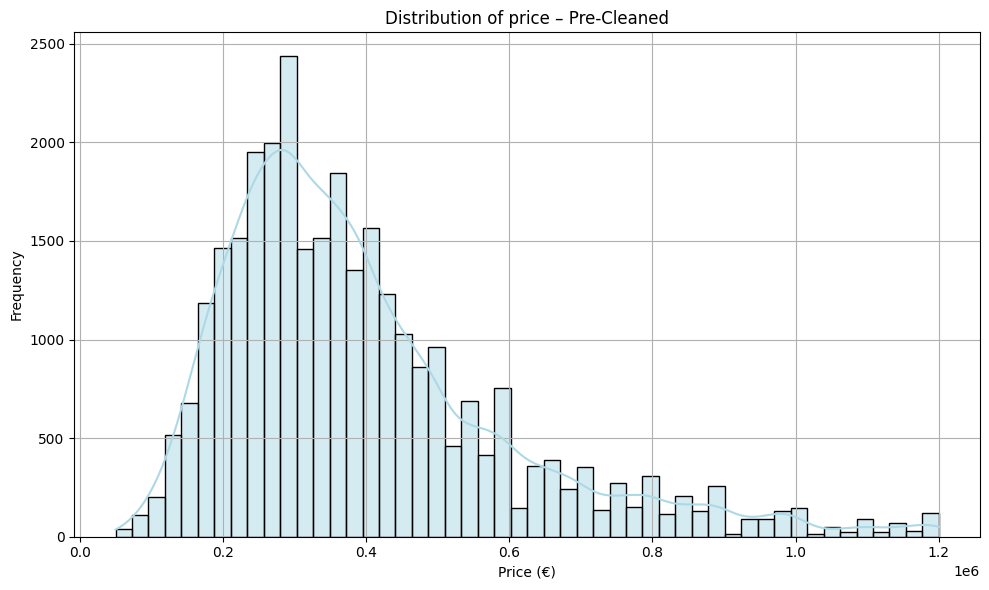

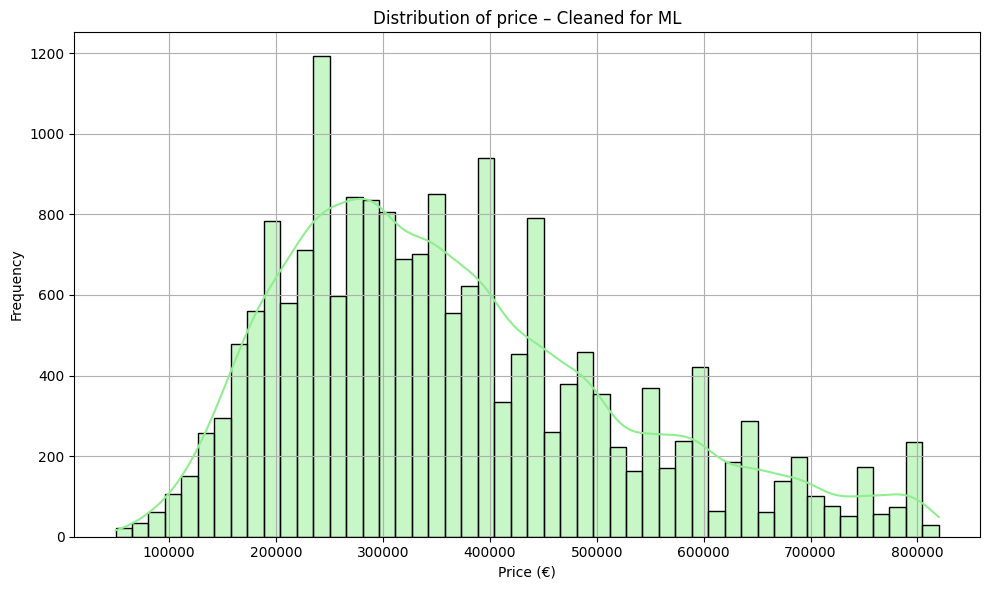

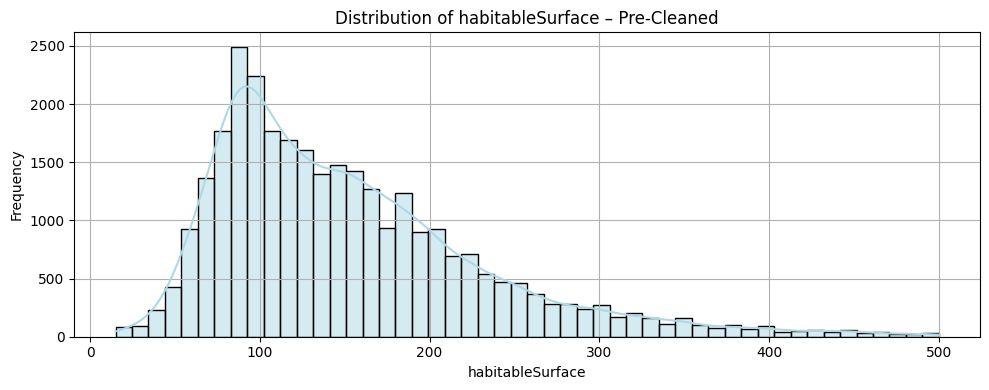

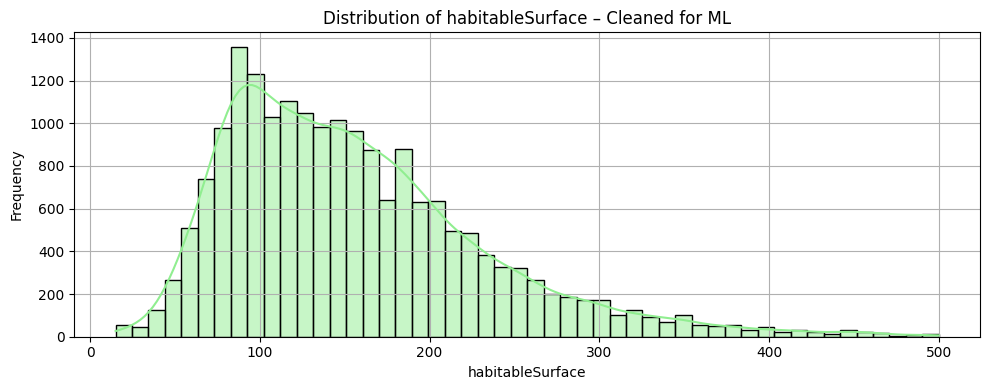

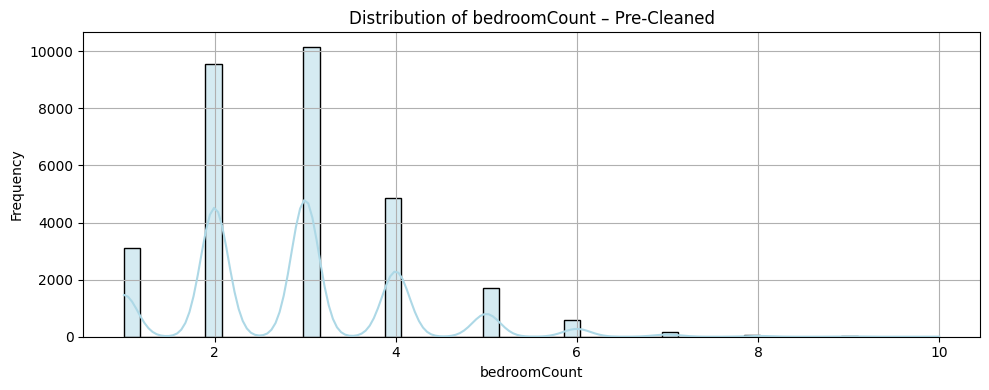

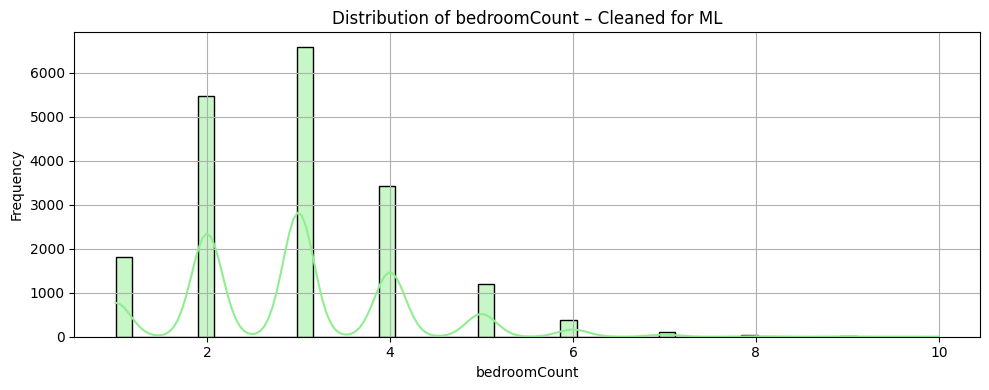

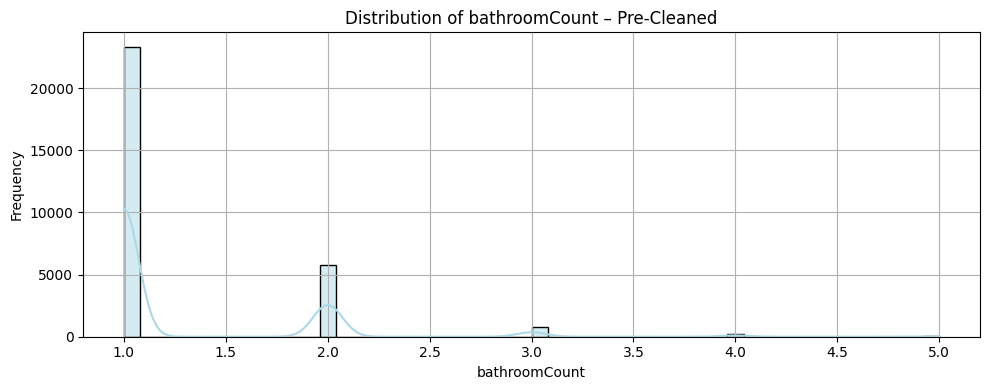

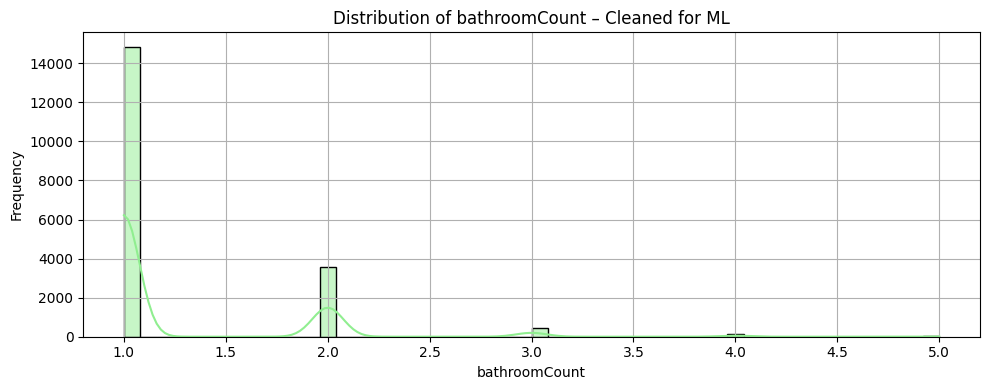

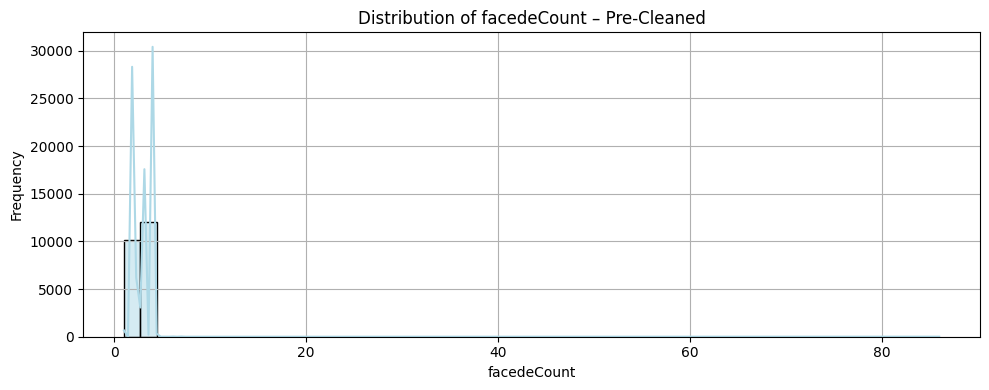

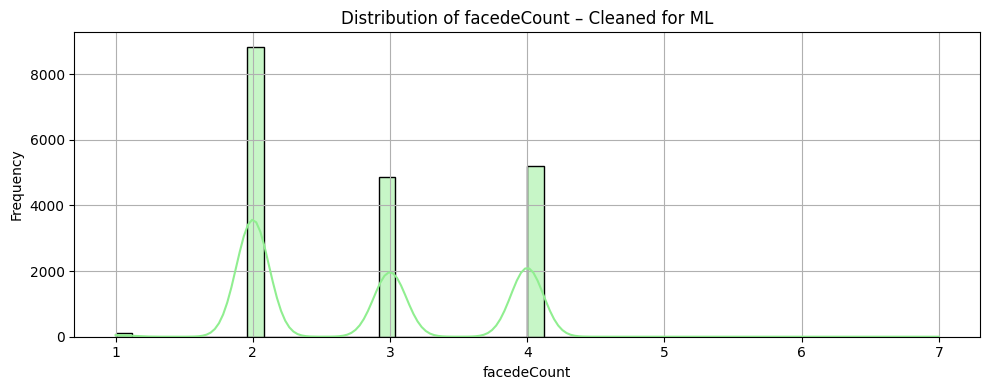

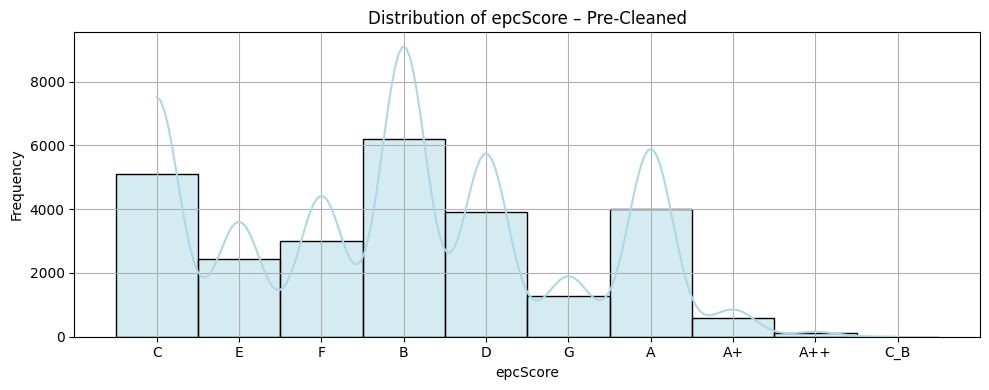

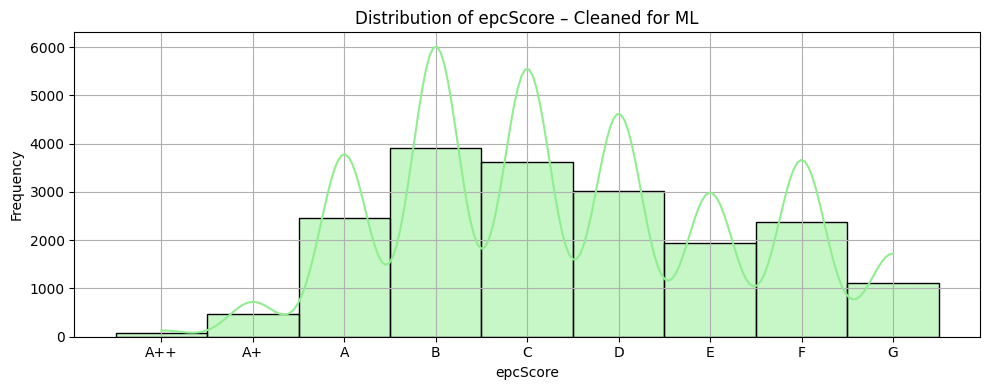

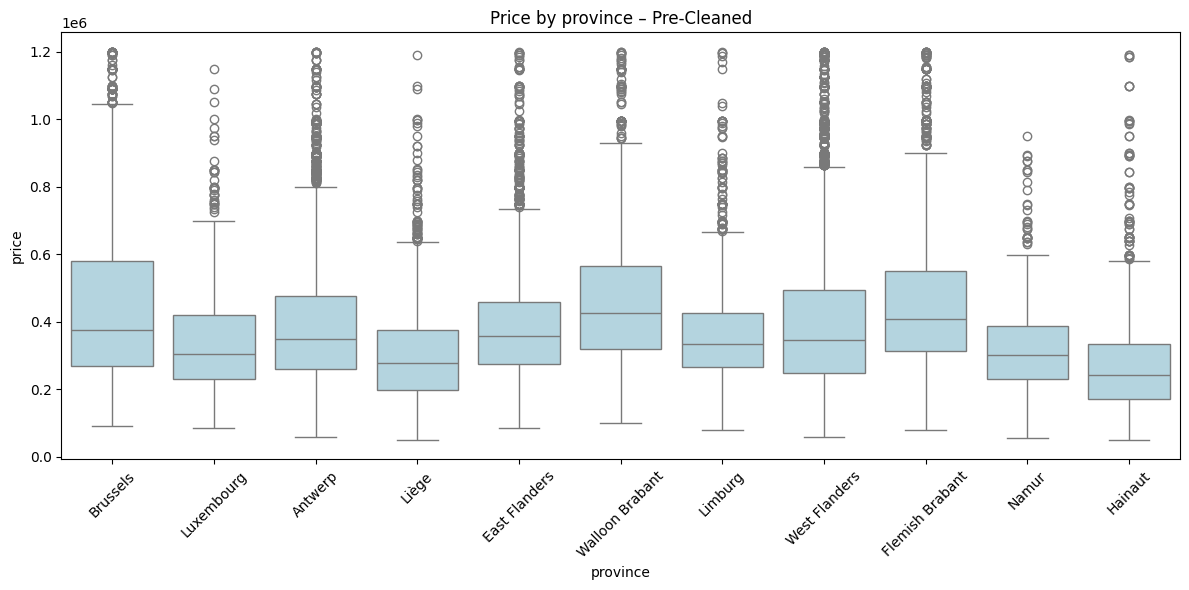

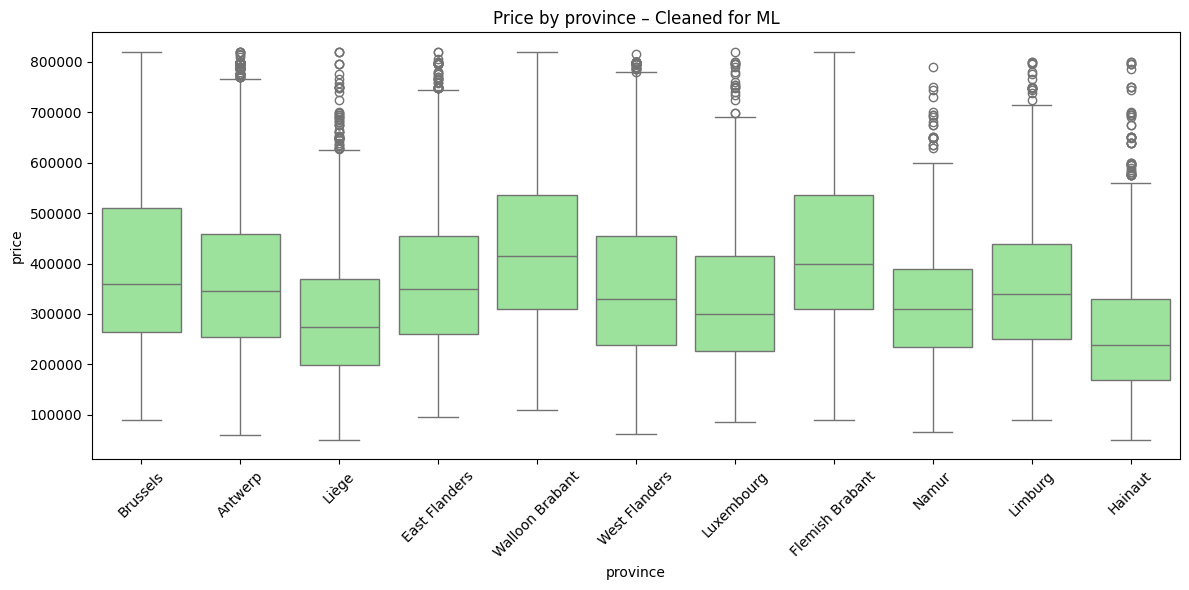

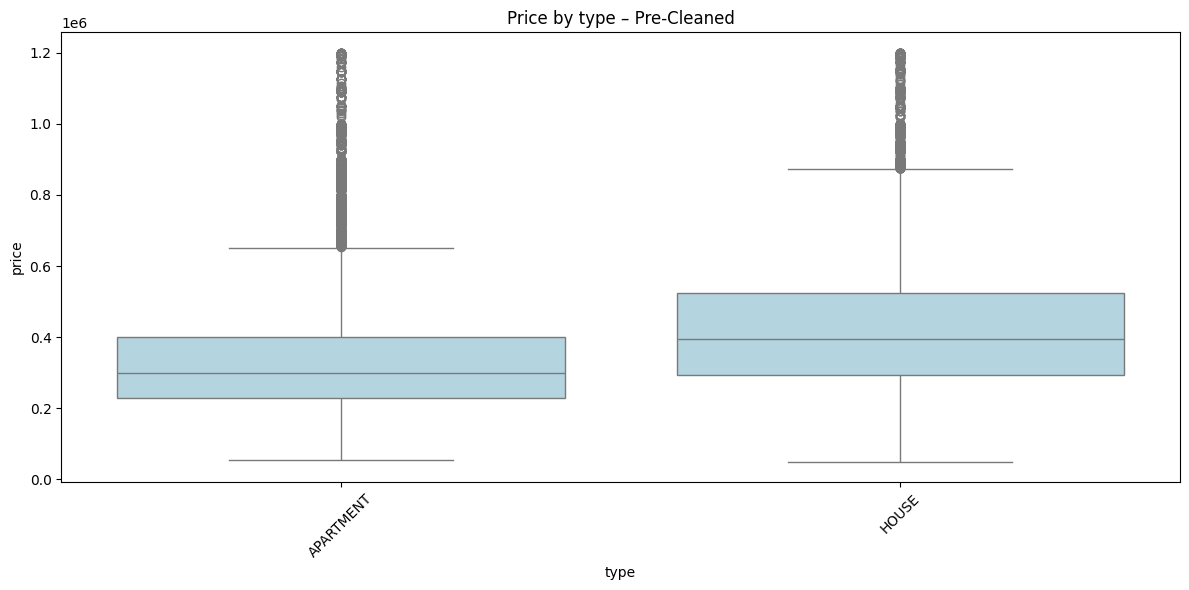

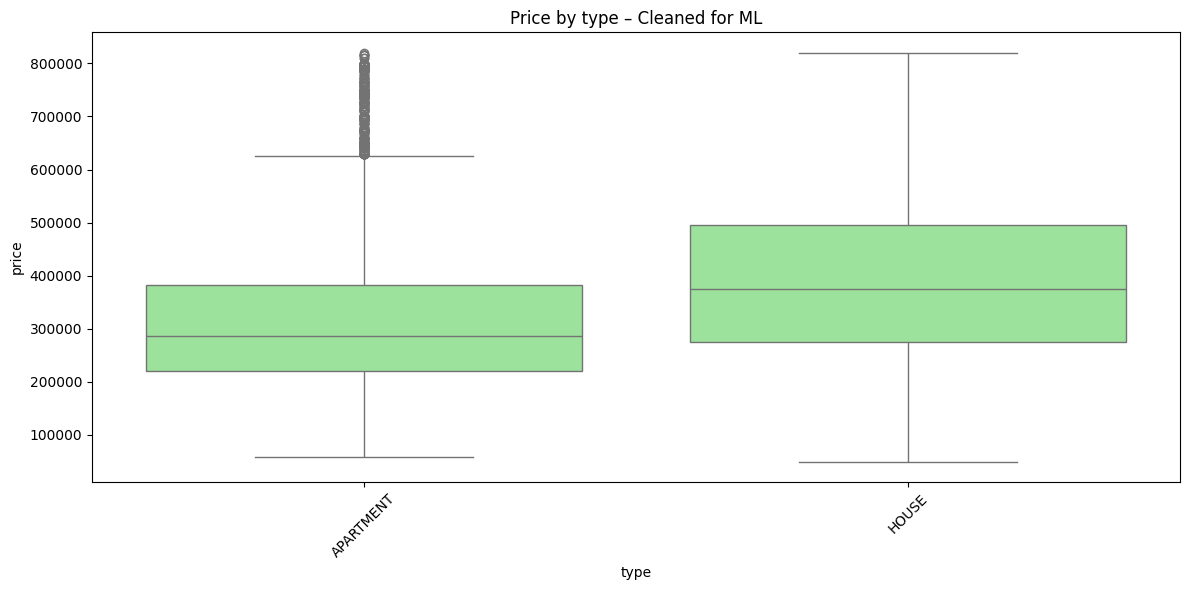

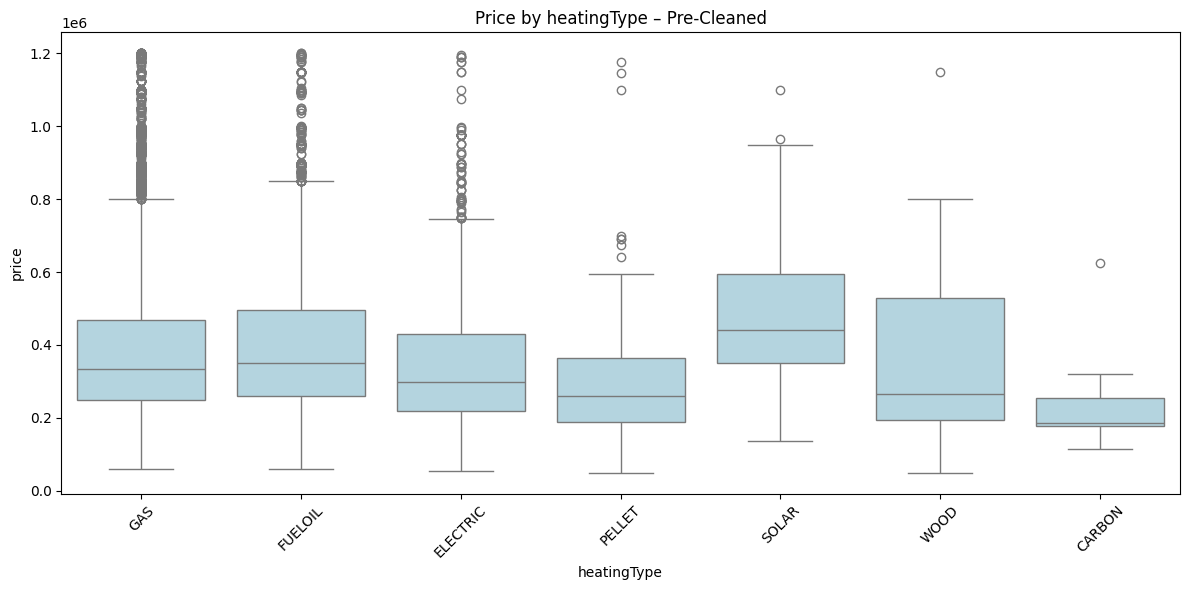

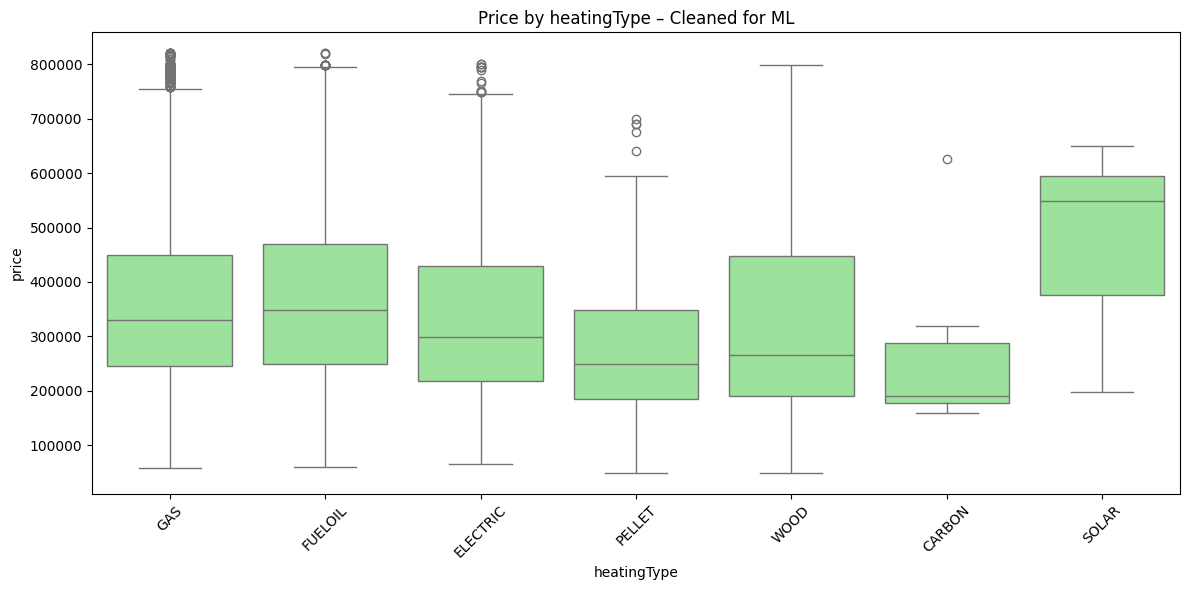

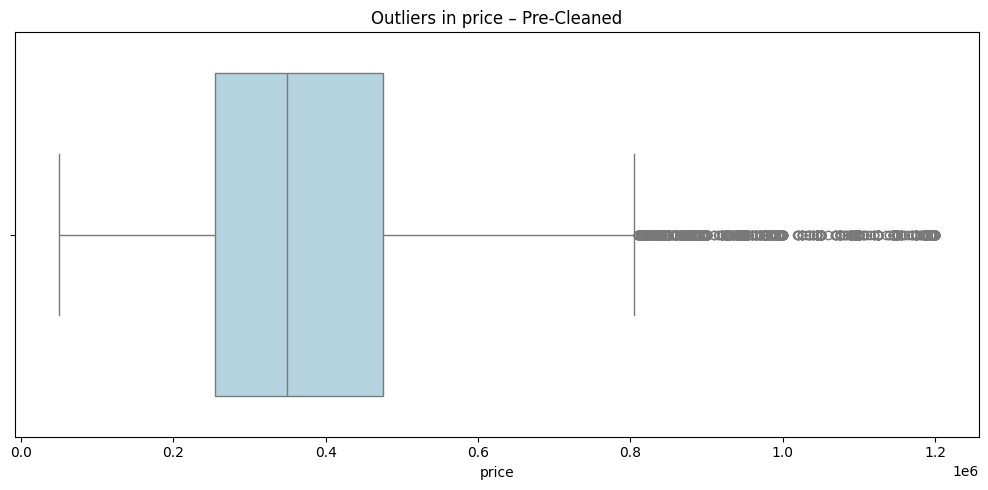

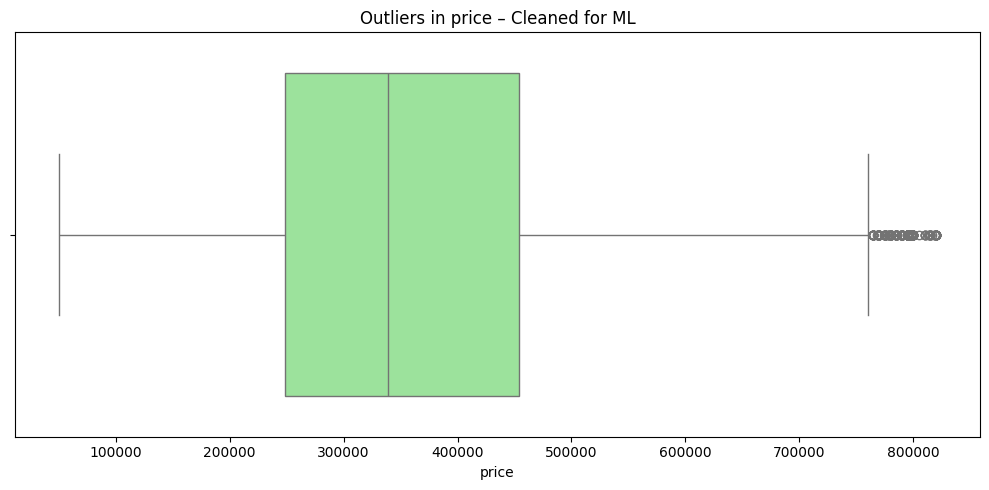

[Info] Numeric columns in cleaned dataset: ['Unnamed: 0', 'id', 'bedroomCount', 'bathroomCount', 'postCode', 'habitableSurface', 'buildingConstructionYear', 'facedeCount', 'toiletCount', 'price']


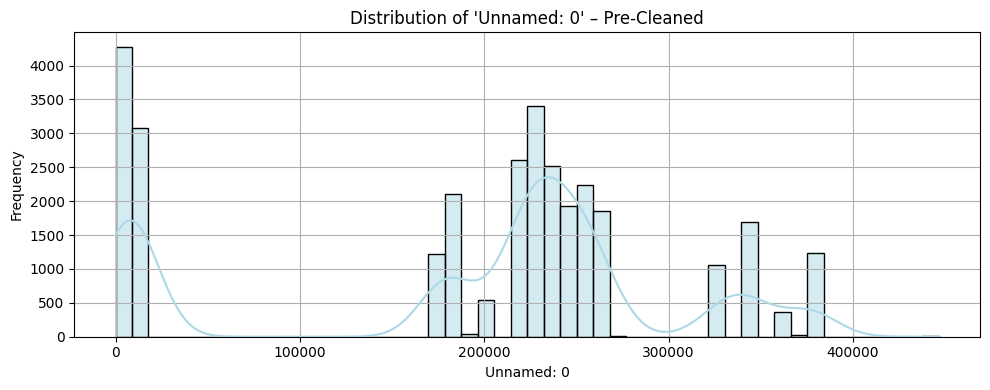

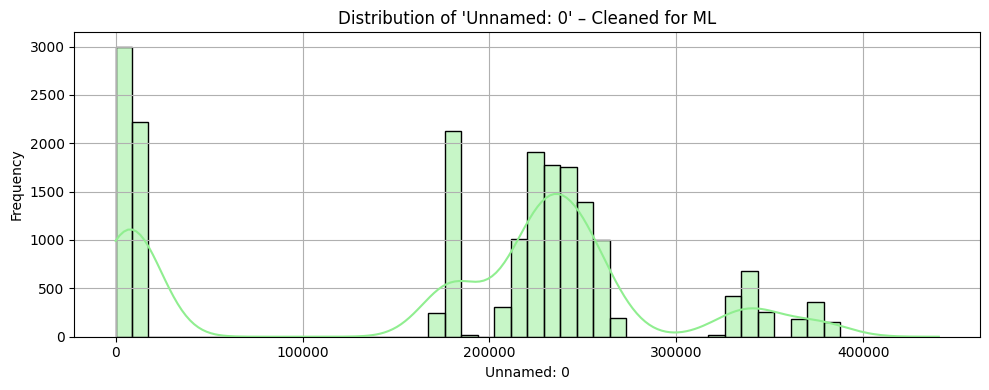

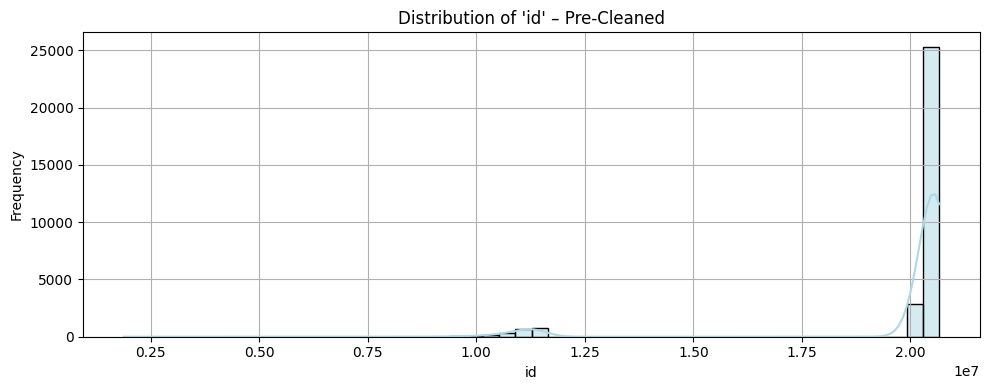

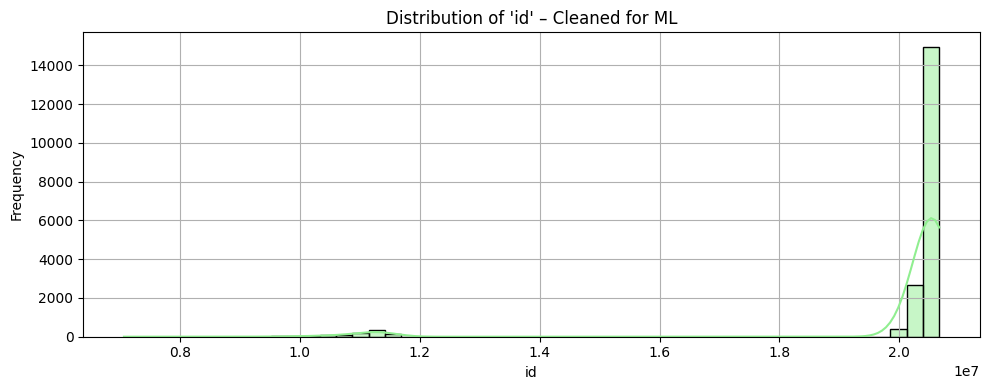

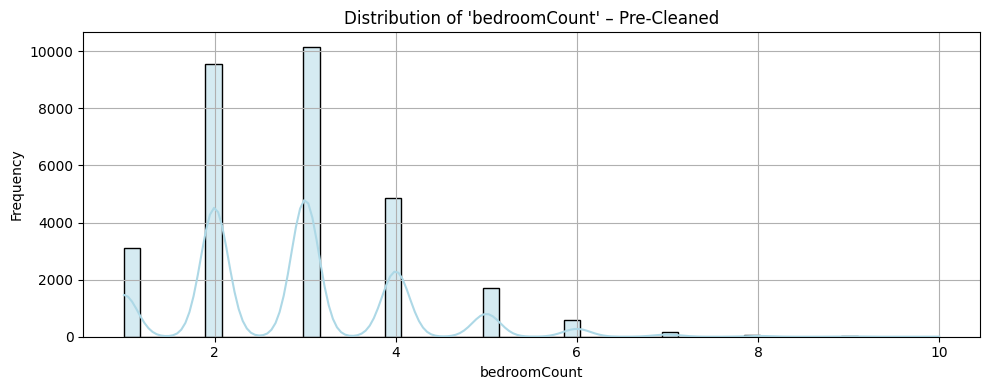

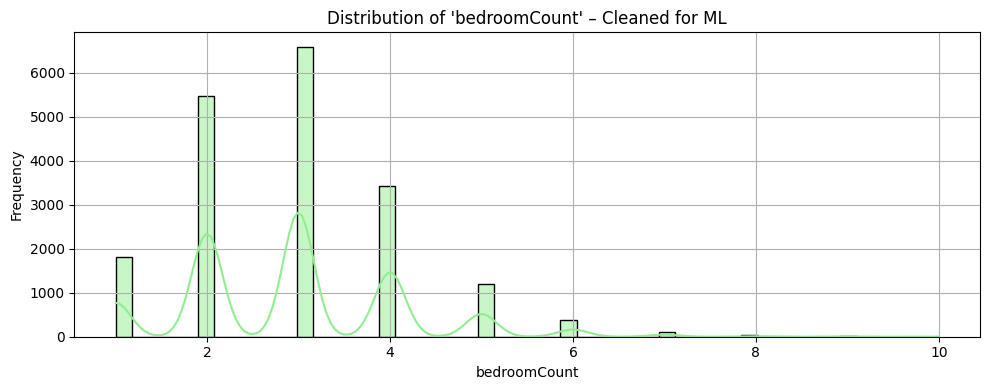

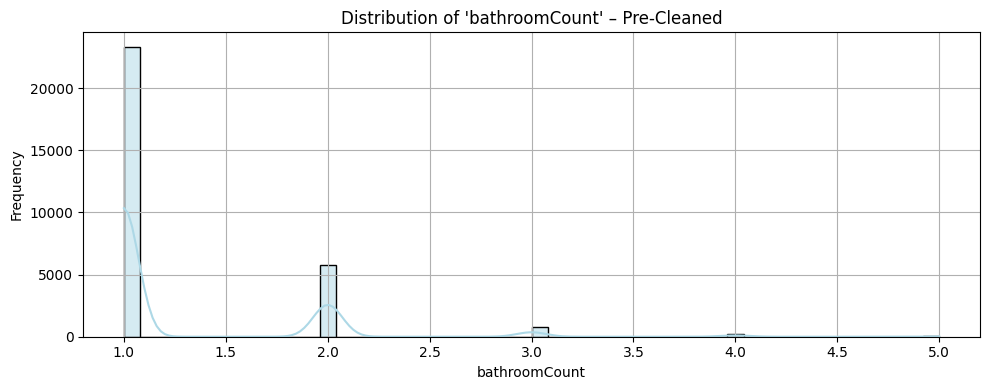

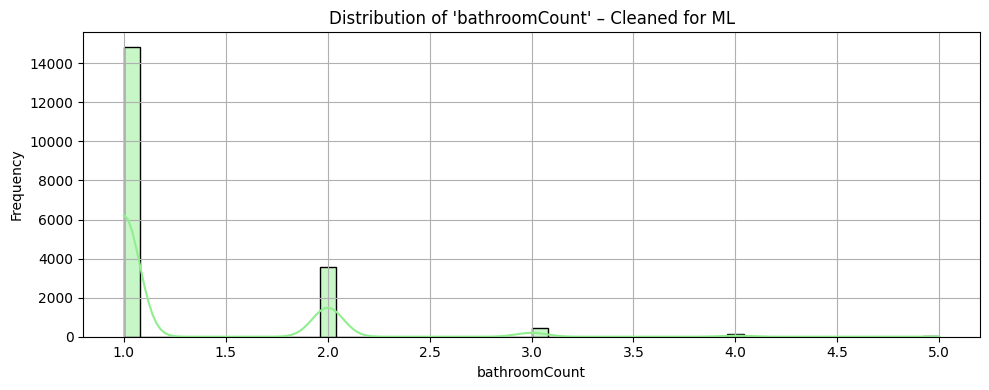

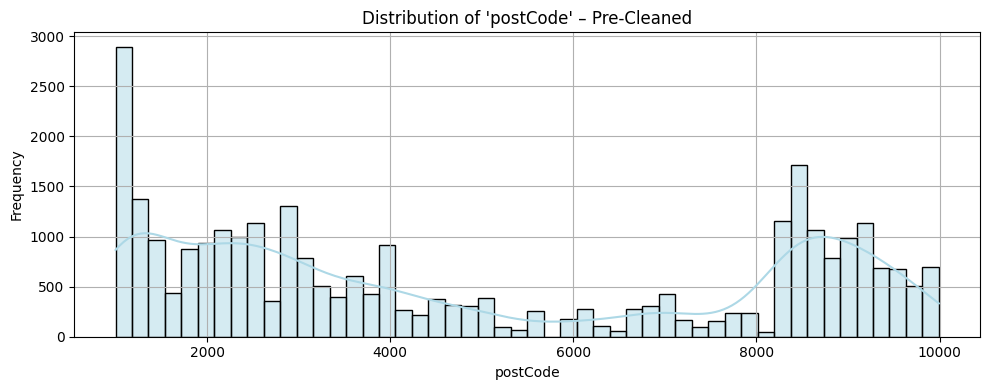

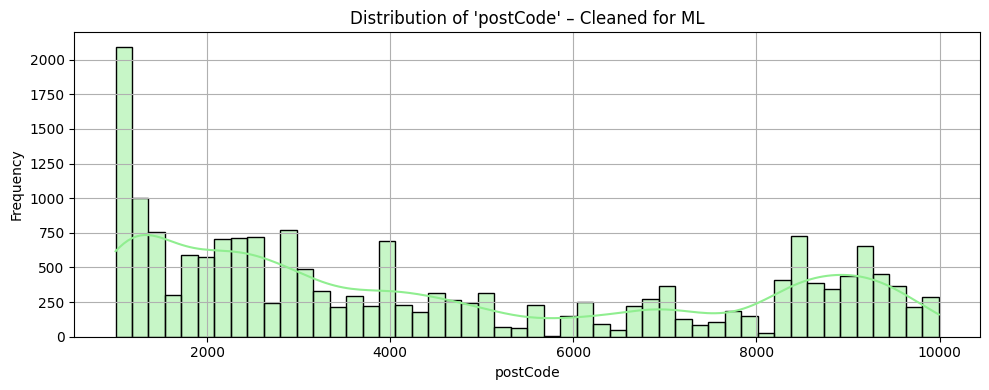

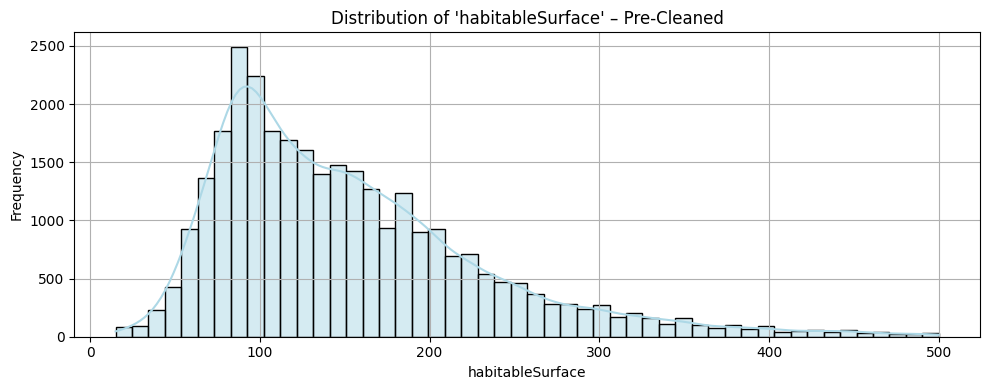

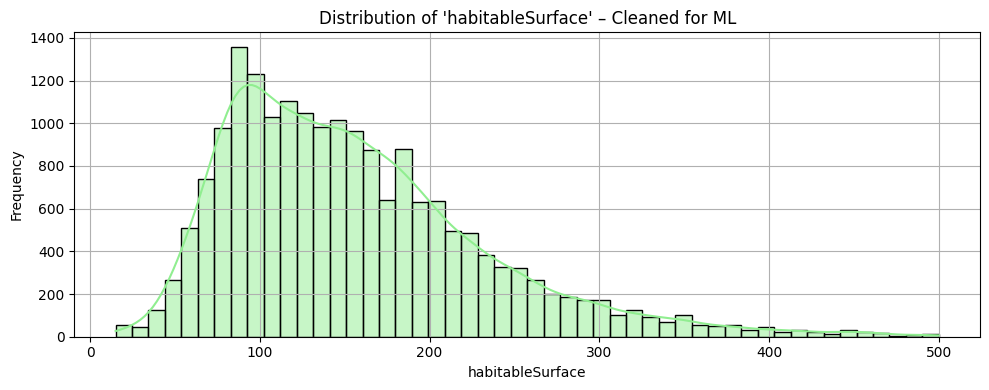

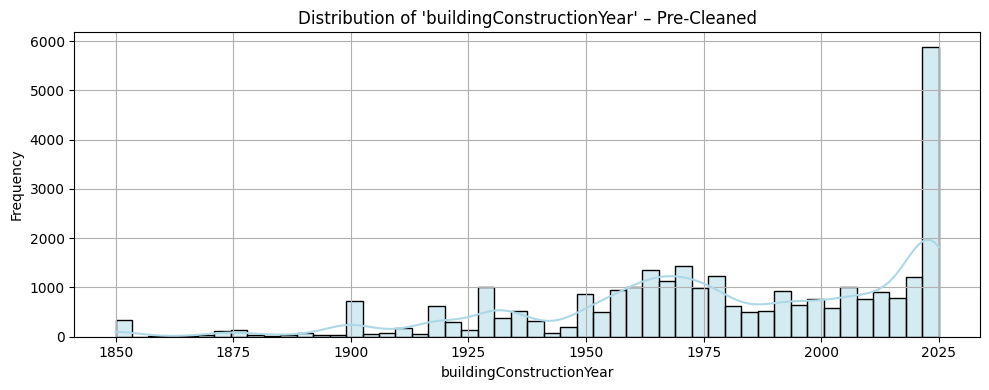

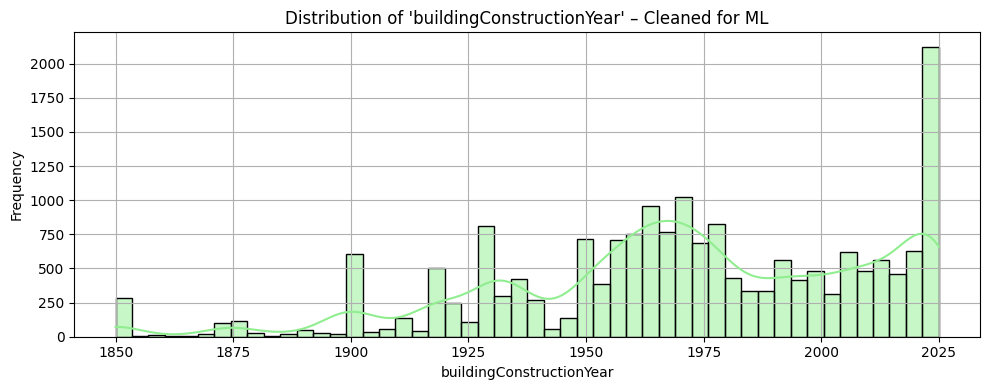

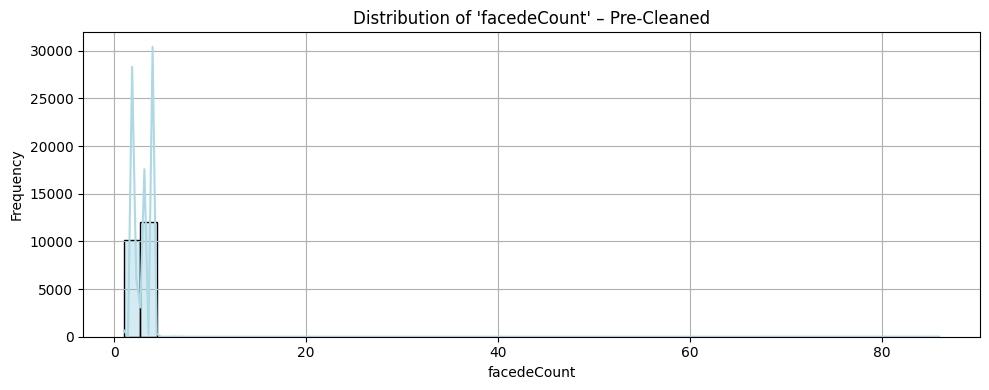

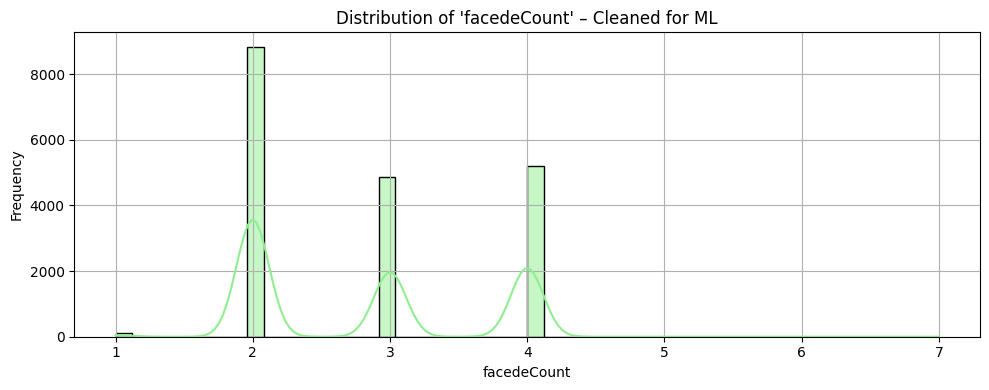

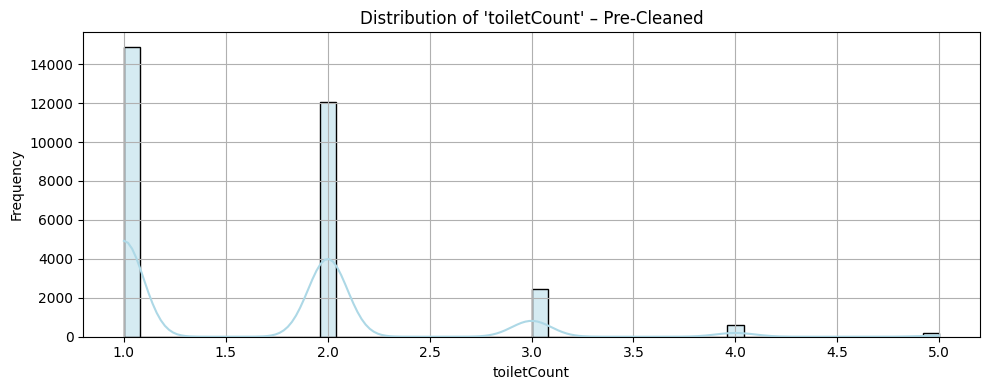

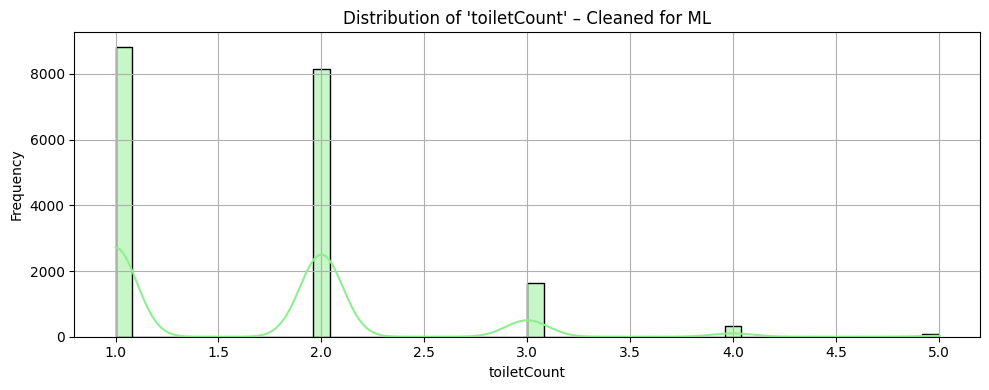

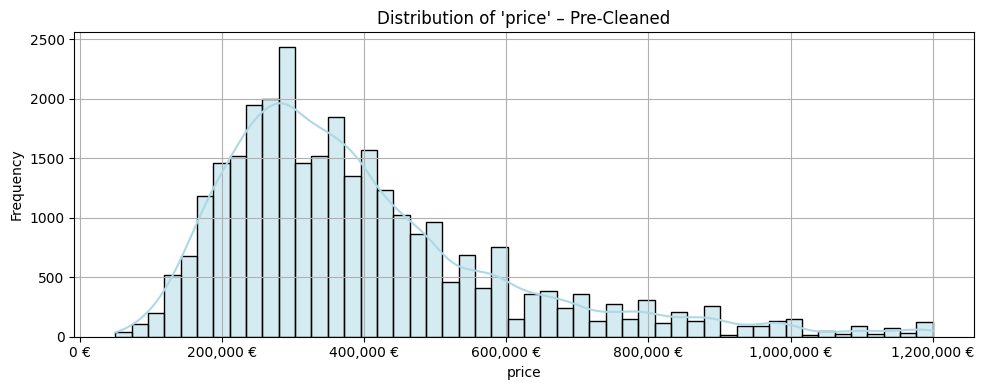

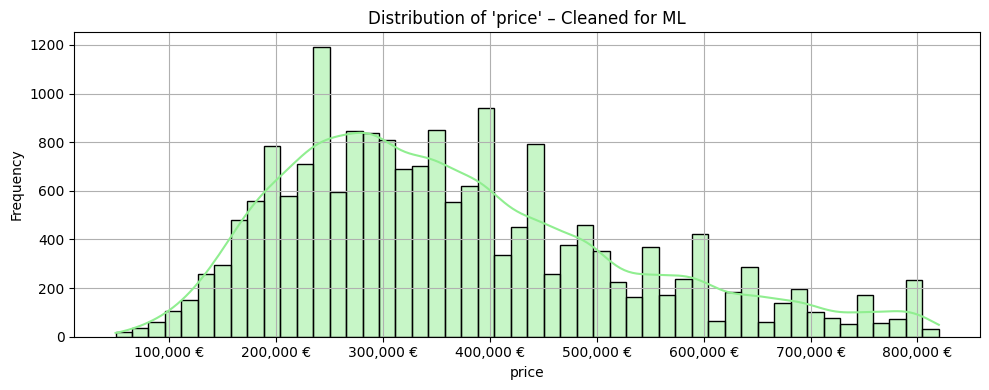

In [5]:
import sys, os

# Add the project root to the Python path
project_root = os.path.abspath("../..")
sys.path.append(project_root)

from datetime import datetime
from utils.constants import CLEANED_DIR


# --------------------------------
# STEP 1 — load cleaned dataset
# --------------------------------
df_cleaned = load_cleaned_dataset(verbose = True) 

# ------------------------------------
# STEP 2 — Apply full cleaning logic
# ------------------------------------
df_cleaned_for_ml, cleaning_metadata = apply_full_cleaning_logic(df_cleaned.copy(), verbose=True)
visualize_dataset_distribution(df_cleaned, target_col="price", df_cleaned_for_ml=df_cleaned_for_ml)





In [6]:
import sys, os

# Add the project root to the Python path
project_root = os.path.abspath("../..")
sys.path.append(project_root)

from datetime import datetime
from utils.constants import CLEANED_DIR


# =======================
# Main Cleaning Pipeline
# =======================

# PARAMS — configure your run here
SAVE_AFTER_CLEANING = True


# ---------------------------------------
# STEP 3 — Save cleaned dataset
# ---------------------------------------

# Generate timestamp for version naming
timestamp = datetime.now().strftime("%Y%m%d_%H%M")
version = f"cleaning_{timestamp}"

# Define export filename and path
cleaned_filename = f"immoweb_real_estate_cleaned_for_ml_{timestamp}.csv"
cleaned_filepath = os.path.join(CLEANED_DIR, cleaned_filename)

# Define a short human-readable description of the cleaning logic
description = "IQR + EPC cleanup + Facade trimming + Surface"

# Structure cleaning metadata into a dictionary for database logging
steps_dict = {
    "outlier_bounds": cleaning_metadata["outlier_bounds"],
    "removed_columns": cleaning_metadata["removed_columns"],
    "applied_filters": cleaning_metadata["applied_filters"]
}

# Save the cleaned dataset to CSV if configured to do so
if SAVE_AFTER_CLEANING:
    df_cleaned_for_ml.to_csv(cleaned_filepath, index=False)
    print(f"Cleaned dataset saved to: {cleaned_filepath}")


# ---------------------------------------
# STEP 4 — Save log in database
# ---------------------------------------

from utils.experiment_tracker import ExperimentTracker

tracker = ExperimentTracker()

# Fake cleaning metadata
steps_dict = {
    "outlier_bounds": "applied",
    "removed_columns": ["url", "id"],
    "applied_filters": ["epcScore not null", "habitableSurface > 20"]
}

cleaning_version_id = tracker.log_cleaning(
    version="test_cleaning_20250628",
    description="Test entry to check database writing",
    rows_after_cleaning=999,
    steps_dict=steps_dict
)

print(f"Cleaning version ID returned: {cleaning_version_id}")

Cleaned dataset saved to: e:\_SoftEng\_BeCode\real-estate-price-predictor\data\cleaned\immoweb_real_estate_cleaned_for_ml_20250628_2030.csv
[✓] Cleaning version 'test_cleaning_20250628' logged with ID 1
Cleaning version ID returned: 1
